<a href="https://colab.research.google.com/github/Alejandro-sin/Learning-Path-to-AI/blob/master/LLM_OpenSource_Hugging_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hugging Faces


Huggin Faces es el sitio por excelencia para la inteligencia artificial opensource, es un espacio que sirve de repositorio de modelos, datasets, y espacios dedicados a la inferencia.



In [1]:
!pip install -q  datasets diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


## Setup

In [2]:
# Use a pipeline as a high-level helper


## AUTH
from google.colab import userdata
from huggingface_hub import login


# TORCH - Diffsuser
import torch
from diffusers import FluxPipeline
from transformers import pipeline
from diffusers import DiffusionPipeline
from datasets import load_dataset

# Display Image and Sound
import soundfile as sf
from IPython.display import Audio, display
from PIL import Image



In [ ]:
hf_token = userdata.get('HF')
login(hf_token, add_to_git_credential=True)

## Pipelines

### Generación de Imagenes


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

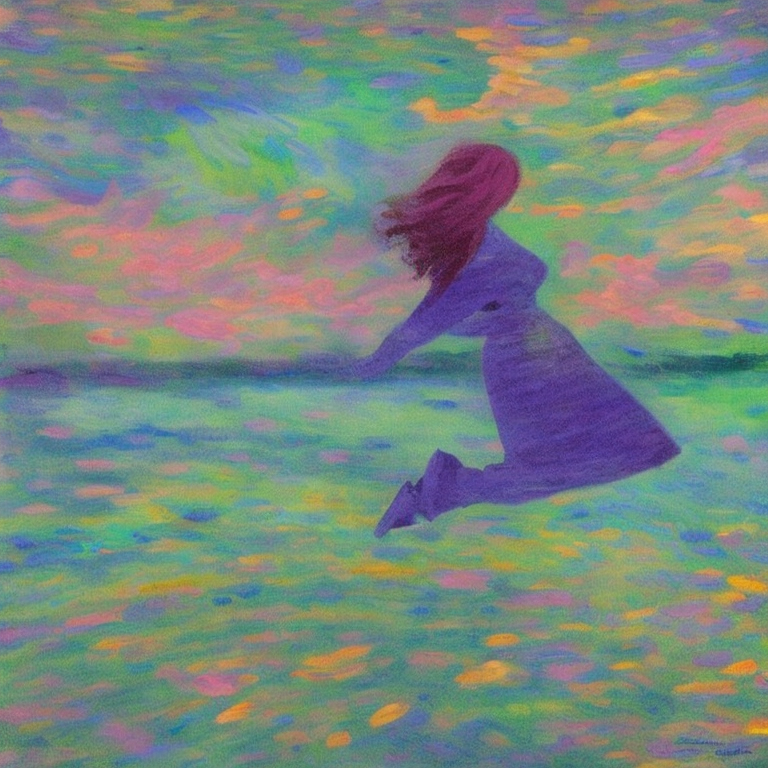

In [10]:
if 1==1:
  image_gen = DiffusionPipeline.from_pretrained(
      "stabilityai/stable-diffusion-2",
      torch_dtype=torch.float16,
      use_safetensors=True,
      variant="fp16"
      ).to("cuda")

  #text = "A reunion of Genius and Maldoror talking each other, in the surreal style of Salvador Dali"
  text = "A lonely person flying and dreaming, in the style of Impresionism of Monet"
  image = image_gen(prompt=text).images[0]
  display(image)
  # image.save("surreal.png")


# Requieres more GPU like A100
if 1==0:
  pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-schnell", torch_dtype=torch.bfloat16).to("cuda")
  generator = torch.Generator(device="cuda").manual_seed(0)
  prompt = "A futuristic class full of students learning AI coding in the surreal style of Salvador Dali"

  # Generate the image using the GPU
  image = pipe(
      prompt,
      guidance_scale=0.0,
      num_inference_steps=4,
      max_sequence_length=256,
      generator=generator
  ).images[0]

  image.save("surreal.png")

### Generación de audio



In [13]:
synthesiser = pipeline("text-to-speech", "microsoft/speecht5_tts", device='cuda')
embeddings_dataset = load_dataset("Matthijs/cmu-arctic-xvectors", split="validation")
speaker_embedding = torch.tensor(embeddings_dataset[7306]["xvector"]).unsqueeze(0)
speech = synthesiser("We cant fail if we learn from it", forward_params={"speaker_embeddings": speaker_embedding})
sf.write("speech.wav", speech["audio"], samplerate=speech["sampling_rate"])

Device set to use cuda


In [14]:
Audio("speech.wav")